In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import getpass

In [2]:
def idx_to_time(arr, samp_rate):
    print(len(arr))
    return np.arange(len(arr))/samp_rate 

In [3]:
def matched_filter(ref_filename, sig_filename, pulse_t, samp_rate, start_time, stop_time, flip = False):
    
    start_samp = int(start_time*samp_rate)
    stop_samp = int(stop_time*samp_rate)
    num_samp = stop_samp - start_samp
    
    t = np.linspace(0, num_samp/samp_rate, num = int(num_samp))
    t_corr = np.linspace(-num_samp/samp_rate, num_samp/samp_rate, num = int(2*num_samp-1))
    
    #Extracting and truncating signal data
    ref = np.fromfile(open(ref_filename), dtype="complex64")[start_samp:stop_samp]
    sig = np.fromfile(open(sig_filename), dtype="complex64")[start_samp:stop_samp]
    
    #Correlating and flipping the signal (or not)
    if flip == False:
        corr = scipy.signal.correlate(sig, ref)
    if flip == True:
        corr = scipy.signal.correlate(-sig, ref)
    
    #Self-correlating the reference signal
    self_corr = scipy.signal.correlate(ref, ref)
    
    #Raw truncated signal plot
    f1, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t, ref)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference Chirp")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t, sig)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title('Delayed Signal Chirp')
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f1.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Self correlation and signal correlation plot
    f2, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference self-correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t_corr, corr, color = '#ff7f0e')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Reference and signal correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f2.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Superimposed self/signal correlation with zoom plot
    f3, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr, label = 'Reference')
    ax[0].plot(t_corr, corr, label = 'Rignal')
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Ampltidue")
    ax[0].set_title("Self-correlation and signal correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[0].legend()

    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], self_corr[int(num_samp-50):int(num_samp+50)], 
                 label = 'Reference')
    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], corr[int(num_samp-50):int(num_samp+50)], 
                label = 'Signal')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Up-close signal and self- correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].legend()
    
    f3.subplots_adjust(wspace = 0)
    
    plt.show()
    
    print(scipy.signal.find_peaks(self_corr[int(num_samp-50):int(num_samp+50)]))
    print(scipy.signal.find_peaks(corr[int(num_samp-50):int(num_samp+50)]))

/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


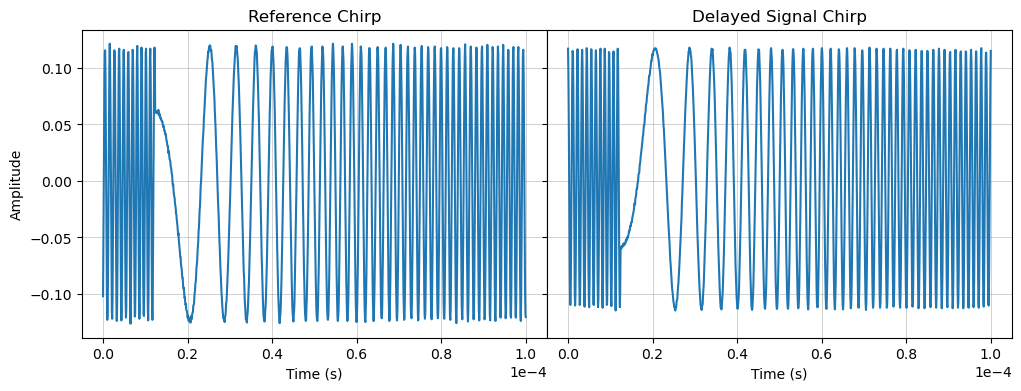

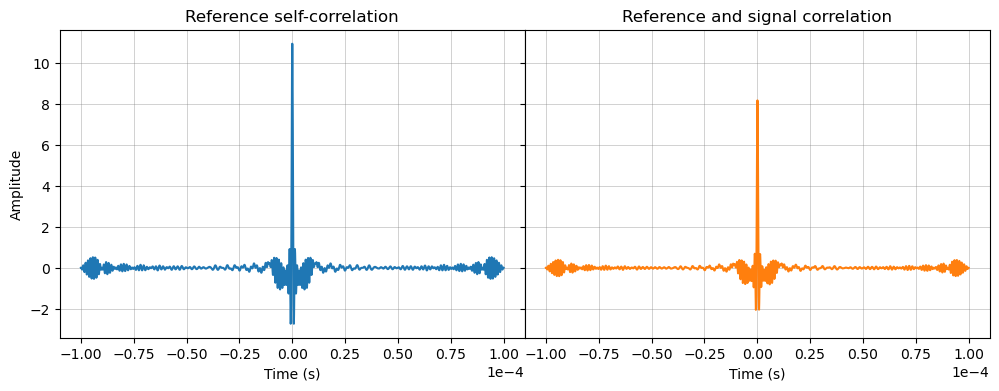

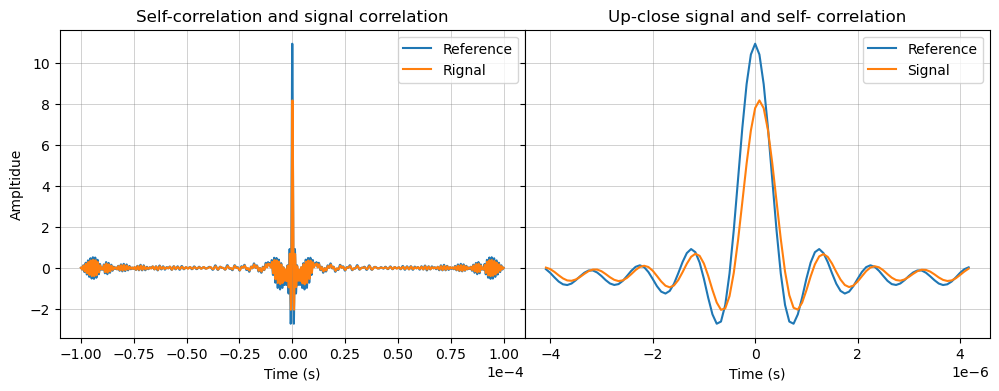

(array([11, 22, 34, 49, 64, 76, 87]), {})
(array([12, 23, 35, 50, 65, 77, 88]), {})


/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [4]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log01", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

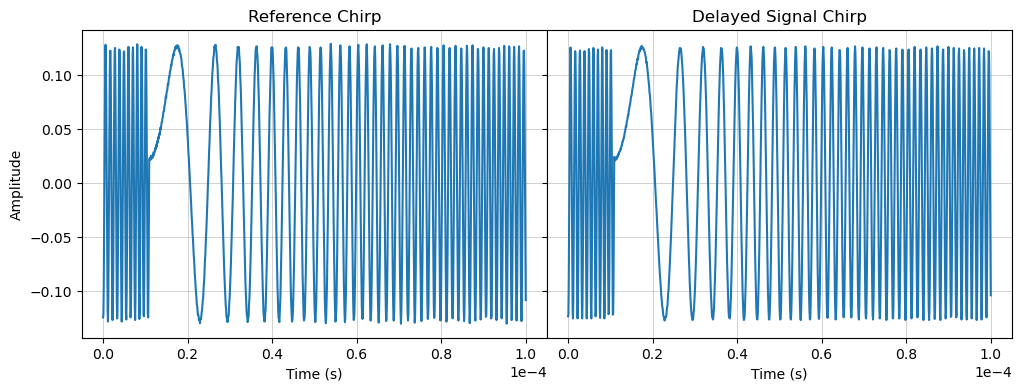

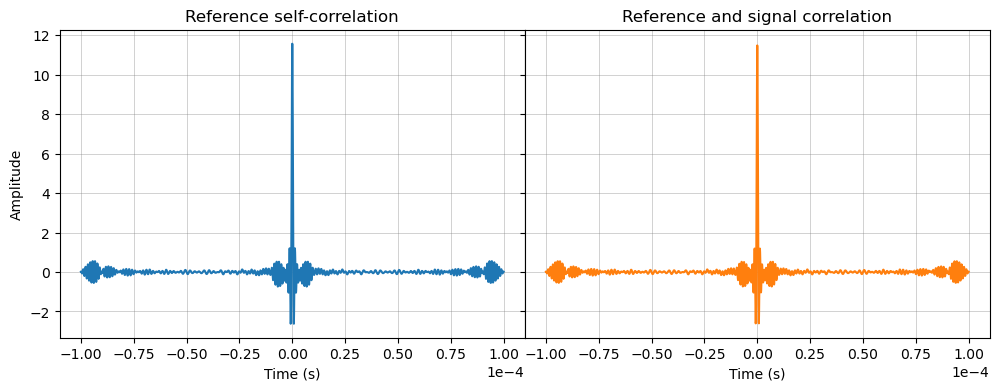

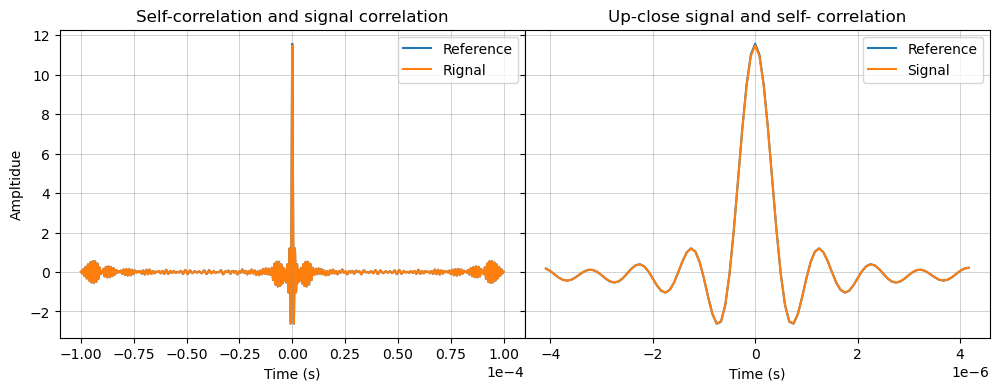

(array([10, 22, 34, 49, 64, 76, 88]), {})
(array([10, 22, 34, 49, 64, 76, 88]), {})


In [5]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log02", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log02", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

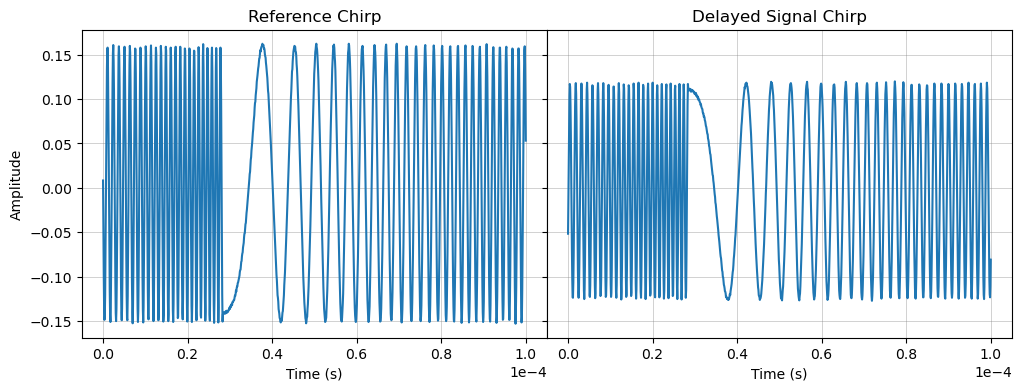

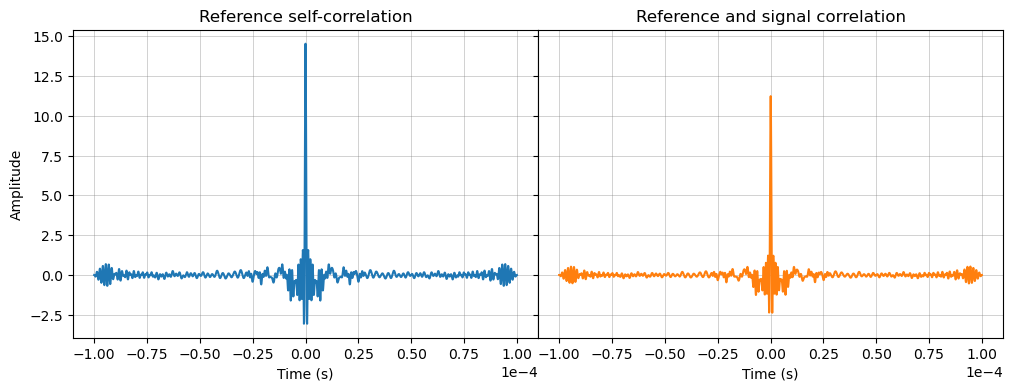

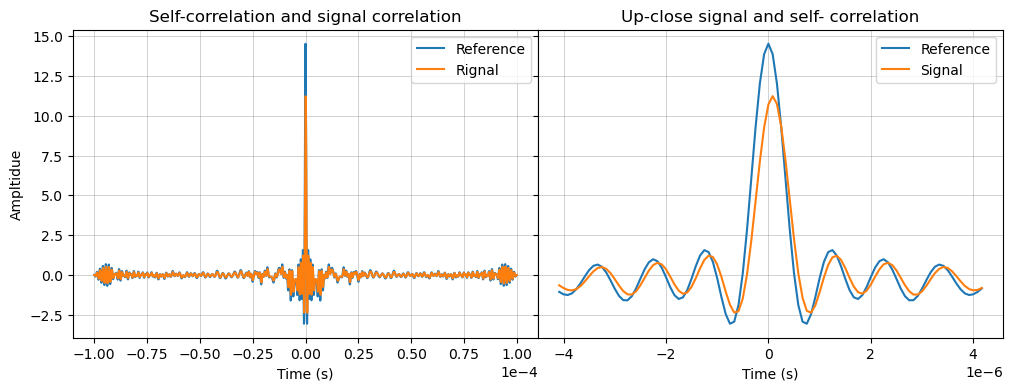

(array([ 9, 22, 34, 49, 64, 76, 89]), {})
(array([10, 23, 35, 50, 65, 77, 90]), {})


In [6]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log03", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log03", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

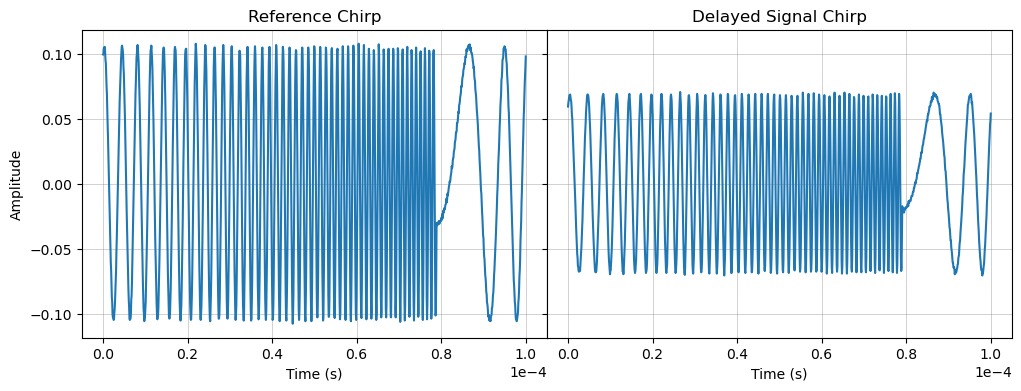

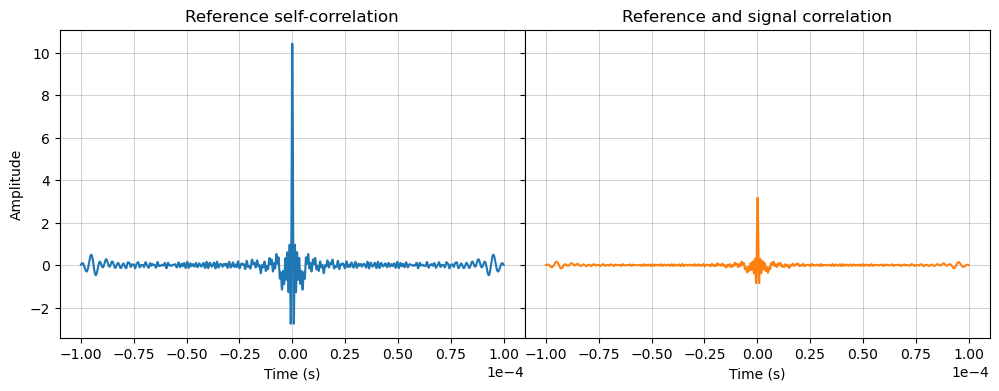

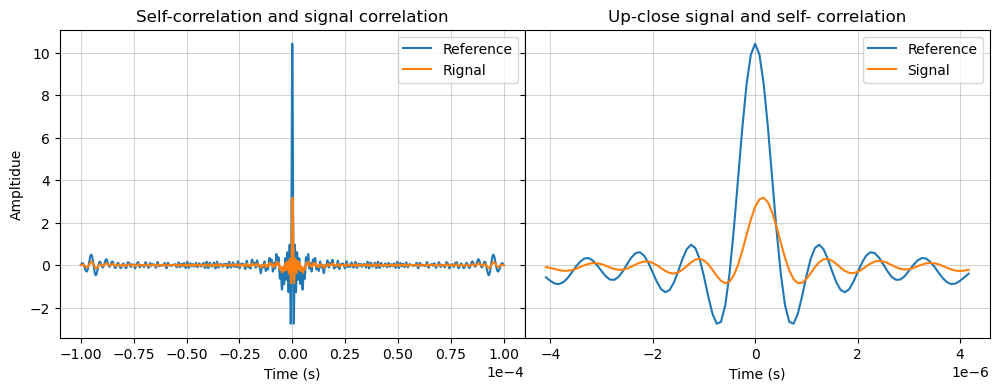

(array([10, 22, 34, 49, 64, 76, 88]), {})
(array([11, 23, 36, 51, 66, 78, 90]), {})


In [7]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log04", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log04", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

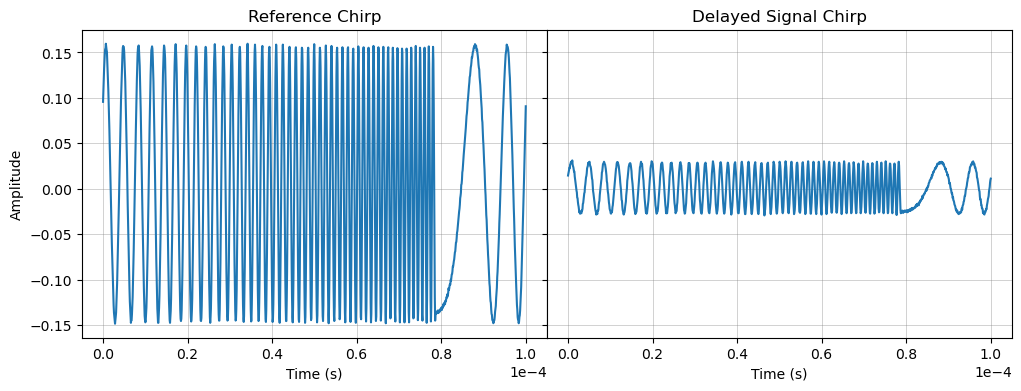

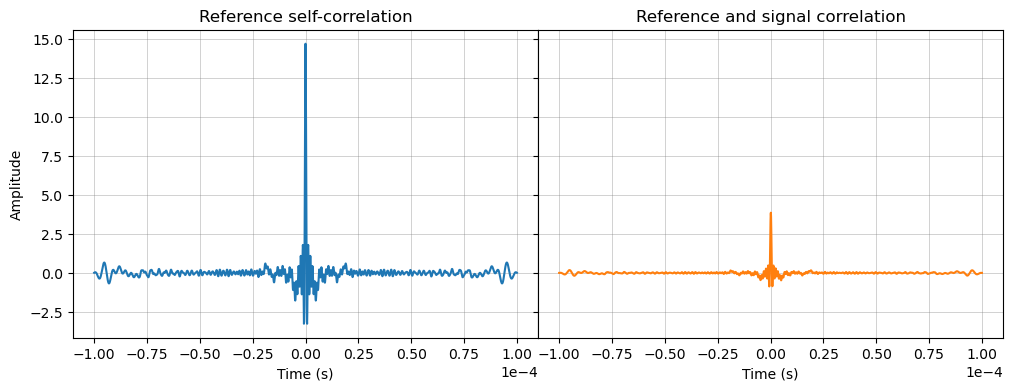

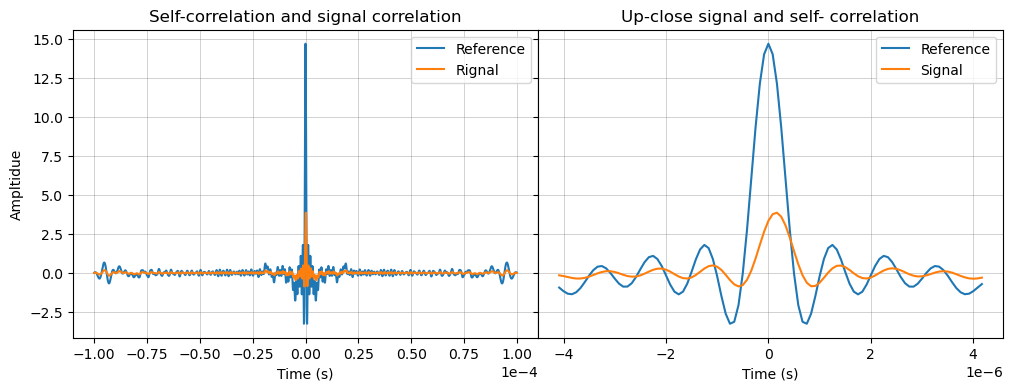

(array([10, 22, 34, 49, 64, 76, 88]), {})
(array([11, 24, 36, 51, 66, 78, 90]), {})


In [8]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log05", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log05", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

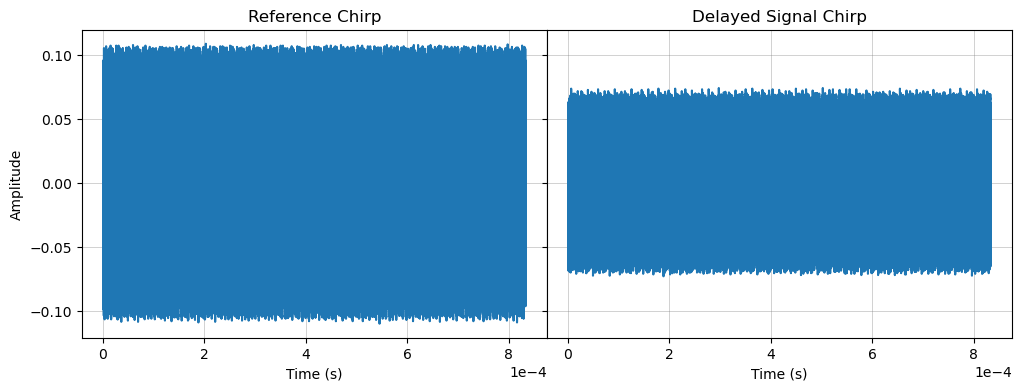

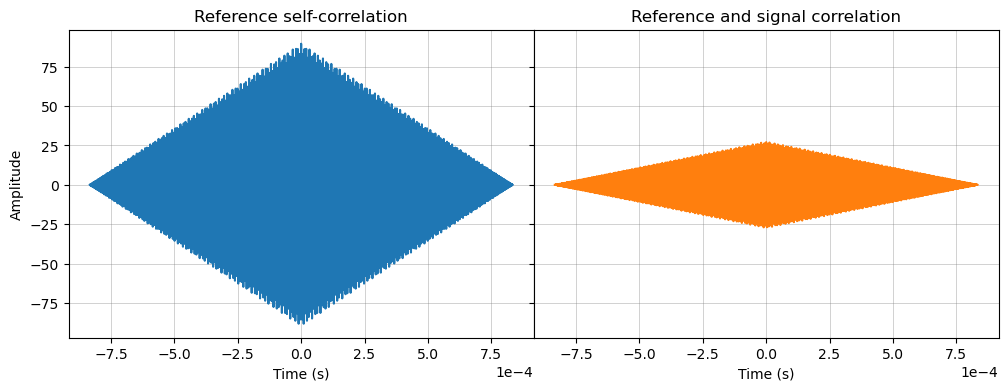

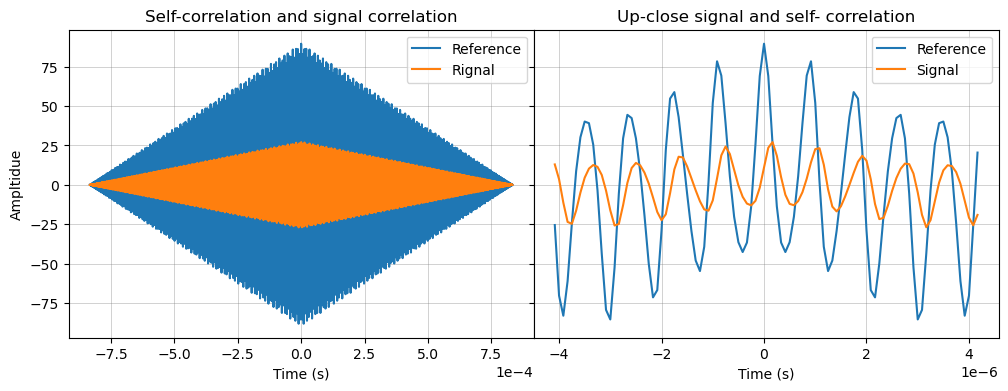

(array([ 7, 17, 28, 38, 49, 60, 70, 81, 91]), {})
(array([ 9, 19, 29, 40, 51, 62, 72, 82, 92]), {})


In [15]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log06", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log06", 
               1/10000, 12e6, 0.1, 0.1+(1/1200), flip = False)